# statistica
+ https://github.com/JuliaAcademy/DataScience/blob/master/03.%20Statistics.ipynb

In [1]:
using Pkg
Pkg.activate(".")

 Activating environment at `C:\Users\i am\Documents\GitHub\stage-Machine-learning\notebook\appunti\Project.toml`


In [2]:
using CSV

In [4]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** inc

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1278
┌ Info: Precompiling MLBase [f0e99cf1-93fa-52ec-9ecc-5026115318e0]
└ @ Base loading.jl:1278


In [3]:
using Pkg#=
Pkg.add("StatsBase")
Pkg.add("RDatasets")
Pkg.add("StatsPlots")
Pkg.add("KernelDensity")
Pkg.add("Distributions")
Pkg.add("HypothesisTests")
Pkg.add("MLBase")=#


  Resolving package versions...
No Changes to `C:\Users\i am\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\i am\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
  Installed ExprTools ─ v0.1.2
  Installed TimeZones ─ v1.3.2
┌ Info: Replacing symlinks in tarball by their source files ...
│ "docs\\src\\LICENSE.md" => "docs\\src\\../../LICENSE.md"
│ "docs\\src\\NEWS.md" => "docs\\src\\../../NEWS.md"
└ @ Pkg.PlatformEngines D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\PlatformEngines.jl:996
┌ Warning: failed to extract archive downloaded from https://pkg.julialang.org/package/df47a6cb-8c03-5eed-afd8-b6050d6c41da/10693c581956334a368c26b7c544e406c4c94385
└ @ Pkg.Operations D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.5\Pkg\src\Operations.jl:559
  Installed Mocking ─── v0.7.1
┌ Info: Replacing symlinks in tarball by their source files ...
│ "JuliaData-RData.jl-10693c5\\docs\\src\\LICENSE.md" => "JuliaData

In [6]:
# usiamo dataset contenente tempi di distanza tra un eruzione del geyser di yellowstone e l'altra + durata eruzione
D = dataset("datasets","faithful")
@show names(D)
D
# Description
# Waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in 
# Yellowstone National Park, Wyoming, USA.
describe(D)

names(D) = ["Eruptions", "Waiting"]


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,,,Float64
2,Waiting,70.8971,43,76.0,96,,,Int64


┌ Warning: Keyword argument hover not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :background_color, :yforeground_color_text, :yguidefontcolor, :seriesalpha, :legendfontcolor, :seriescolor, :ztick_direction, :zlims, :overwrite_figure, :xguidefonthalign, :normalize, :linestyle, :xflip, :fillcolor, :ygrid, :background_color_inside, :zguidefonthalign, :bins, :yscale, :xtickfontcolor, :xguide, :fillalpha, :tick_direction, :yguidefontsize, :legendfontfamily, :foreground_color, :xtickfonthalign, :x, :ytickfontrotation, :legend, :discrete_values, :ytick_direction, :xguidefontrotation, :ribbon, :tickfontrotation, :xdiscrete_values, :legendtitle, :xgridstyle, :orientation, :gridstyle, :markersize, :camera, :xforeground_color_grid, :quiver, :zticks, :markerstrokecolor, :ztickfontrotation, :ztickfonthalign, :legendfonthalign, :xtickfontsize, :levels, :zgridstyle, :foreground_color_border, :zguidefontvalign, :marker_z, :markerstrokealpha, :markeralpha, :tickfontvalign

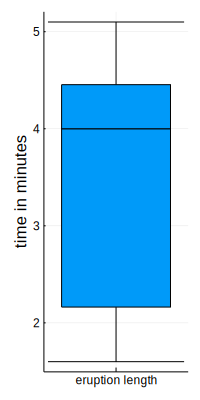

In [8]:
boxplot(["eruption length"],eruptions,legend=false,size=(200,400),whisker_width=1,ylabel="time in minutes")

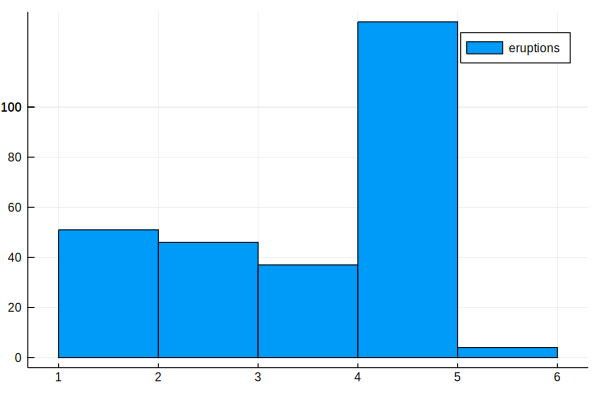

In [9]:
histogram(eruptions,label="eruptions")

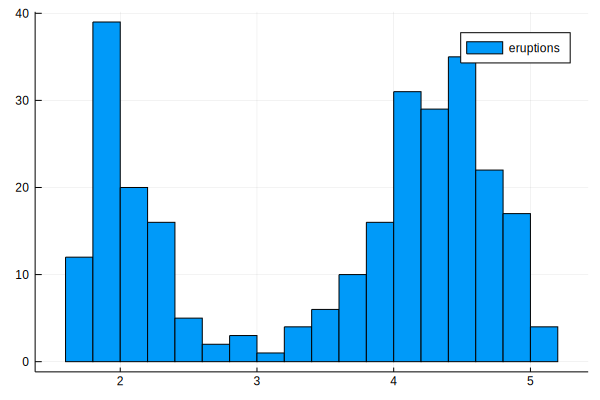

In [10]:
# vediamo che maggioranza delle eruz durano tra i 4 e 5 min 
# (si vedeva anche dal boxplot: dataset ha uguale numero di eruz avvenute con durata tra 4 e 5.1 che tra 1.6 e 4)


histogram(eruptions,bins=:sqrt,label="eruptions")

In [11]:
# vediamo che in realtà ci sono più eruzioni(densità) di durata 1.8:2 che di durata 4:4.2 o 4.4:4.6

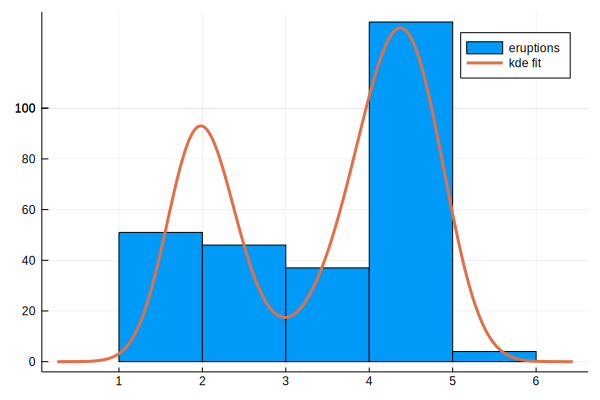

In [12]:
# kernel density estimates
# possiamo visualizzare funzione dens kernel a plot per trovare punti interessanti con più facilità
p=kde(eruptions)
histogram(eruptions,label="eruptions")
plot!(p.x,p.density .* length(eruptions), linewidth=3,color=2,label="kde fit") # nb of elements*bin width
# NB cambio di scala: 
the "density contribution" of every point added to one of these histograms is 1/(nb of elements)*bin width

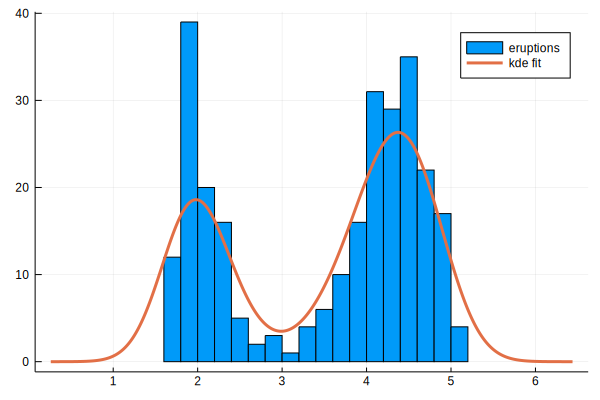

In [13]:
# così anche dal plot a barre più gresso vediamo che attorno a 2 ci sono valori con densità alta, anche
# se in 1:2 e 2:3 non c'è un numero relativamente alto di campioni rispetto al totale
histogram(eruptions,bins=:sqrt,label="eruptions")
plot!(p.x,p.density .* length(eruptions) .*0.2, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

## distribuzioni

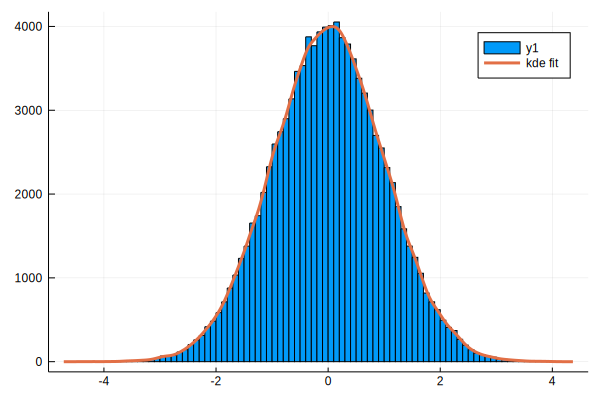

In [14]:
# ora prendiamo la distribuzione normale e vediamo che genera un grafico a campana
myrandomvector = randn(100_000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

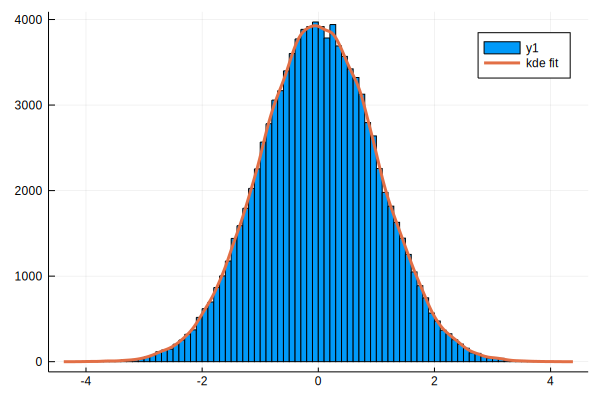

In [17]:
# possiam fare la stessa cosa usando pkg distributionsn e dichiarando che distr usiamo
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

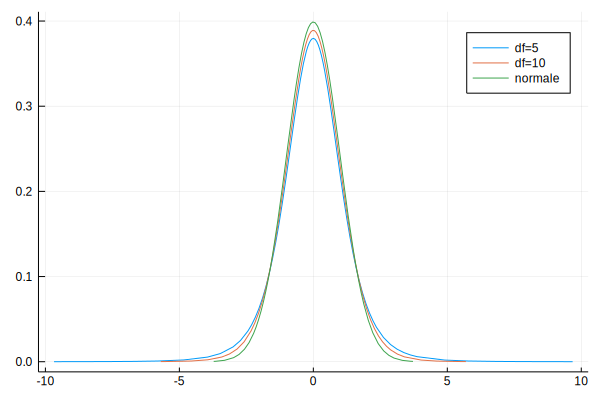

In [28]:
plot(TDist(5), label="df=5")
plot!(TDist(10), label="df=10")
plot!(Normal(), label="normale")
# distribuzione t si avvicina a normale all aumentare dei gradi di libertà

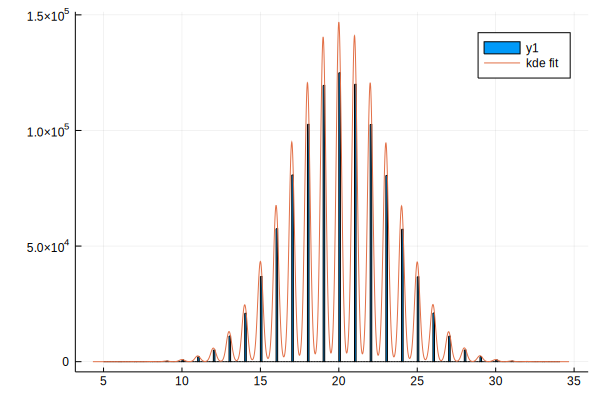

In [26]:
b = Binomial(40) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=2,label="kde fit") # nb of elements*bin width

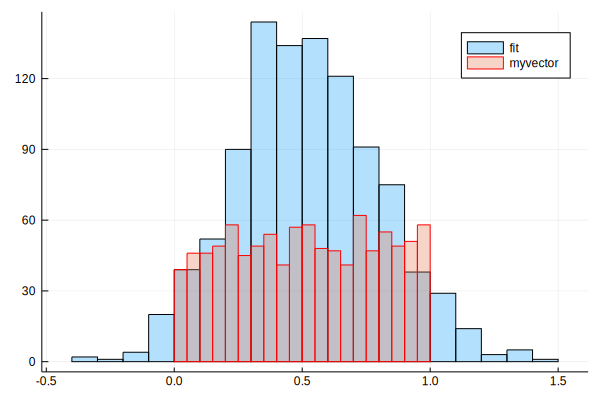

In [29]:
# fitting di valori a una distribuzione
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

## t test

In [31]:
?OneSampleTTest

search: OneSampleTTest OneSampleHotellingT2Test OneSampleZTest OneSampleADTest



```
OneSampleTTest(xbar::Real, stddev::Real, n::Int, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that `n` values with mean `xbar` and sample standard deviation `stddev`  come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(v::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a one sample t-test of the null hypothesis that the data in vector `v` comes from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)

---

```
OneSampleTTest(x::AbstractVector{T<:Real}, y::AbstractVector{T<:Real}, μ0::Real = 0)
```

Perform a paired sample t-test of the null hypothesis that the differences between pairs of values in vectors `x` and `y` come from a distribution with mean `μ0` against the alternative hypothesis that the distribution does not have mean `μ0`.

Implements: [`pvalue`](@ref), [`confint`](@ref)


In [32]:
# in pratica OneSampleTTest(dati) testa 
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.02021996714296359
    95% confidence interval: (-0.0786, 0.0382)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.4969

Details:
    number of observations:   1000
    t-statistic:              -0.6796240617399459
    degrees of freedom:       999
    empirical standard error: 0.029751694033900523


In [33]:
# test ci dice che media se h0=true è 0
# confint a livello 95% comprende 0
# quindi test non riesce a rigettare ipotesi nulla per quel livello di conf


In [38]:
#Pkg.add("Conda")
using Conda
#Conda.add("scipy")
scipy_stats = pyimport("scipy.stats")
@show scipy_stats.spearmanr(eruptions,waittime)
@show scipy_stats.pearsonr(eruptions,waittime)

  Resolving package versions...
No Changes to `C:\Users\i am\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\i am\.julia\environments\v1.5\Manifest.toml`
┌ Info: Running `conda install -y scipy` in root environment
└ @ Conda C:\Users\i am\.julia\packages\Conda\3rPhK\src\Conda.jl:113


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\i am\.julia\conda\3

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icc_rt-2019.0.0            |       h0cc432a_1         6.0 MB
    scipy-1.5.0                |   py38h9439919_0        12.0 MB
    ------------------------------------------------------------
                                           Total:        18.0 MB

The following NEW packages will be INSTALLED:

  icc_rt             pkgs/main/win-64::icc_rt-2019.0.0-h0cc432a_1
  scipy              pkgs/main/win-64::scipy-1.5.0-py38h9439919_0



icc_rt-2019.0.0      | 6.0 MB    | ########## | 100% 
scipy-1.5.0          | 12.0 MB   | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
scipy_stats.spearmanr(eru

(0.9008111683218126, 8.129958506620234e-100)

In [39]:
cor(eruptions,waittime)
# correlazione tende a 1 quindi var son fortemente correlate positivamente

0.900811168321813

In [40]:
corspearman(eruptions,waittime)

0.7779720576516121

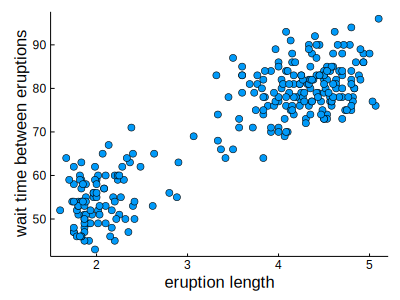

In [41]:
scatter(eruptions,waittime,xlabel="eruption length",
    ylabel="wait time between eruptions",legend=false,grid=false,size=(400,300))

In [ ]:
#in pratica eruzioni avvenute dopo un attesa superiore tendono a durare più a lungo

## confusion matrix
+ https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62 

una confusion matrix è una matrice spesso usata per descrivere performance di un modello di classificazione su un data set di cui sappiamo i veri valori, vediamo un esempio

| n = 165 | **Predicted NO** | **Predicted YES**|
|---|---|---|
|**Actual NO**|50|10|
|**Actual YES**|5|100|

questa matrice ci dice che, ad esempio, il modello, usato su questo campione di 165 elementi, aveva predetto NO su 55 elementi, dei quali 5 erano, in realtà YES

In [42]:

gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]
C = confusmat(2, gt, pred)   # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)

2×2 Array{Int64,2}:
 5  2
 1  0

## auc score
+ https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5  

il punteggio auc giudica quatn il modello riesca a individuare correttamente la classificazione

In [45]:
#gt = [1, 1, 1, 1, 1, 1, 1, 0];
#pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

0.8333333333333334

No documentation found.

`MLBase.roc` is a `Function`.

```
# 17 methods for generic function "roc":
[1] roc(gt::AbstractArray{T,1} where T<:Integer, pr::AbstractArray{T,1} where T<:Integer) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:162
[2] roc(gt::AbstractArray{T,1} where T<:Integer, scores::AbstractArray{T,1} where T<:Real) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:302
[3] roc(gt::AbstractArray{T,1} where T<:Integer, scores::AbstractArray{T,1} where T<:Real, n::Integer) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:299
[4] roc(gt::AbstractArray{T,1} where T<:Integer, scores::AbstractArray{T,1} where T<:Real, n::Integer, ord::Base.Order.Ordering) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:296
[5] roc(gt::AbstractArray{T,1} where T<:Integer, scores::AbstractArray{T,1} where T<:Real, thres::Real) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:184
[6] roc(gt::AbstractArray{T,1} where T<:Integer, scores::AbstractArray{T,1} where T<:Real, t::Real, ord::Base.Order.Ordering) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:181
[7] roc(gt::AbstractArray{T,1} where T<:Integer, preds::Tuple{PV,SV}) where {PV<:(AbstractArray{T,1} where T<:Integer), SV<:(AbstractArray{T,1} where T<:Real)} in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:369
[8] roc(gt::AbstractArray{T,1} where T<:Integer, preds::Tuple{PV,SV}, n::Integer) where {PV<:(AbstractArray{T,1} where T<:Integer), SV<:(AbstractArray{T,1} where T<:Real)} in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:363
[9] roc(gt::AbstractArray{T,1} where T<:Integer, preds::Tuple{PV,SV}, n::Integer, ord::Base.Order.Ordering) where {PV<:(AbstractArray{T,1} where T<:Integer), SV<:(AbstractArray{T,1} where T<:Real)} in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:360
[10] roc(gt::AbstractArray{T,1} where T<:Integer, preds::Tuple{PV,SV}, thres::Real) where {PV<:(AbstractArray{T,1} where T<:Integer), SV<:(AbstractArray{T,1} where T<:Real)} in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:217
[11] roc(gt::AbstractArray{T,1} where T<:Integer, preds::Tuple{PV,SV}, t::Real, ord::Base.Order.Ordering) where {PV<:(AbstractArray{T,1} where T<:Integer), SV<:(AbstractArray{T,1} where T<:Real)} in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:214
[12] roc(gt::AbstractArray{T,1} where T<:Integer, scores::AbstractArray{T,1} where T<:Real, thresholds::AbstractArray{T,1} where T<:Real) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:294
[13] roc(gt::AbstractArray{T,1} where T<:Integer, scores::AbstractArray{T,1} where T<:Real, thresholds::AbstractArray{T,1} where T<:Real, ord::Base.Order.Ordering) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:256
[14] roc(gt::AbstractArray{T,1} where T<:Integer, scores::AbstractArray{T,1} where T<:Real, ord::Base.Order.Ordering) in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:301
[15] roc(gt::AbstractArray{T,1} where T<:Integer, preds::Tuple{PV,SV}, thresholds::AbstractArray{T,1} where T<:Real) where {PV<:(AbstractArray{T,1} where T<:Integer), SV<:(AbstractArray{T,1} where T<:Real)} in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:357
[16] roc(gt::AbstractArray{T,1} where T<:Integer, preds::Tuple{PV,SV}, thresholds::AbstractArray{T,1} where T<:Real, ord::Base.Order.Ordering) where {PV<:(AbstractArray{T,1} where T<:Integer), SV<:(AbstractArray{T,1} where T<:Real)} in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:305
[17] roc(gt::AbstractArray{T,1} where T<:Integer, preds::Tuple{PV,SV}, ord::Base.Order.Ordering) where {PV<:(AbstractArray{T,1} where T<:Integer), SV<:(AbstractArray{T,1} where T<:Real)} in MLBase at C:\Users\i am\.julia\packages\MLBase\85ImQ\src\perfeval.jl:366
```
